# <span style='color:white'> <center>Portafolios de inversión con Python</center> </span>

## Theory
1. Metricas para el Analisis de Activos
2. Metricas para el Analisis del Portafolio
3. Portafolio de H. Markowitz (Riesgo vs Rendimiento)
4. Frontera Eficiente
5. El modelo CAPM (Capital Asset Price Model)
6. Beta y Sharp Ratio

### 1.- Metricas para el Analisis de Activos


$\textbf{Rendimiento esperado del activo:}$
$$\bar{r} = \frac{1}{n} \sum_{i=1}^{n} r_i$$

$\textbf{Varianza del activo:}$
$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^2$$

$\textbf{Riesgo del activo:}$
$$\sigma = \sqrt{\sigma^2}$$

$\textbf{Beta de mercado:}$
$$\beta = \frac{\text{Cov(}r_A, r_m\text{)}}{Var(r_m)} = \frac{\sigma_{A,m}}{\sigma_m^2} = \frac{ρ_{A,m} σ_m σ_A}{\sigma_m^2} = \frac{ρ_{A,m}σ_A}{\sigma_m}$$


### 2.- Metricas para el Analisis de Portafolio
$\textbf{Rendimiento esperado del Portafolio:}$

$$
E(r_p) = \sum_{i=1}^{n} w_i \cdot \bar{r}_i
\quad \textbf{  donde} \quad
\sum_{i=1}^{n} w_i = 1
$$

$\textbf{Varianza del Portafolio:}$
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \cdot w_j \cdot \sigma_{i,j}
\quad \textbf{  donde} \quad
\sigma_{i,j} \quad \textbf{= Covarianza} \quad
$$

$\textbf{Riesgo del Portafolio:}$
$$
\sigma_p = \sqrt{\sigma_p^2}
$$


### 3.- Portafolio de Markowitz y Frontera Eficiente

Maximizar Rendimientos buscando el menor Riesgo Posible


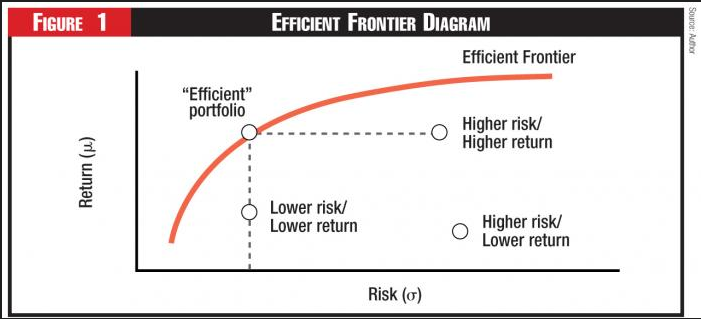


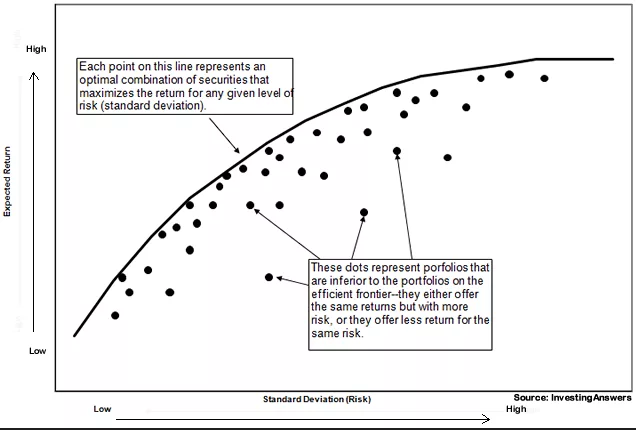

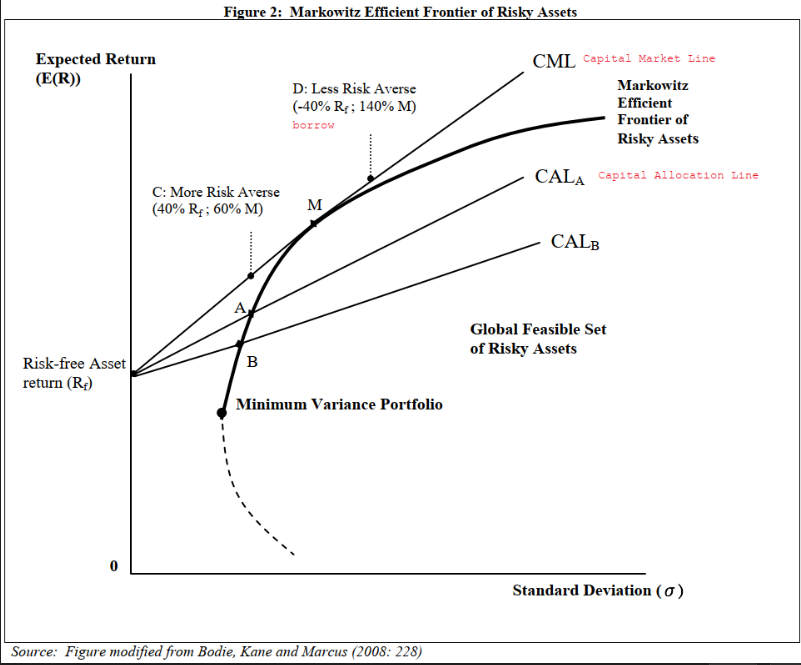

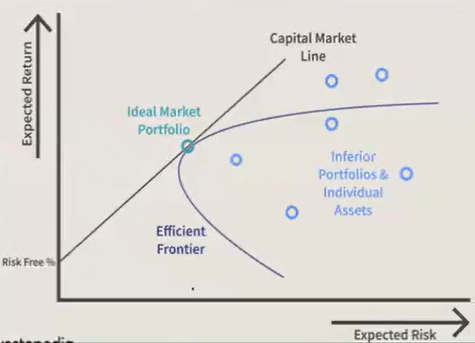

### 4.- El modelo CAPM (Capital Asset Price Model)

Estimar el precio de un activo con base en el riesgo del mercado.

Es el rendimiento minimo (Rf) mas la prima de riesgo (Rm-Rf) que le corresponde al activo (Beta).

$$
R_i = R_f + \beta_i \cdot (R_m - R_f)
$$

$R_i$: Asset Return

$R_f$: Risk-free Asset Return (Treasuries, CETES, etc.)

$\beta_i$: Variance of the Asset Return w.r.t. Market variance

$R_m$: Market Return

$R_m - R_f$: Risk Premium. Spread between Market and Risk-free Asset Returns. se traduce como la compensación que un inversionista recibe por el riesgo aceptado (también conocido como riesgo de mercado)

The market **Beta (${\beta}$)** is the ratio of the covariance of assets return with the market portfolio, normalized by the market return variance.

**Beta (${\beta}$) is the quantity of systematic risk.**

Mathematically, the market beta is equivalent to a factor loading in the APT framework, where the only risk factor is the market return.

Is a measure of asset's systematic risk: exposure to the market

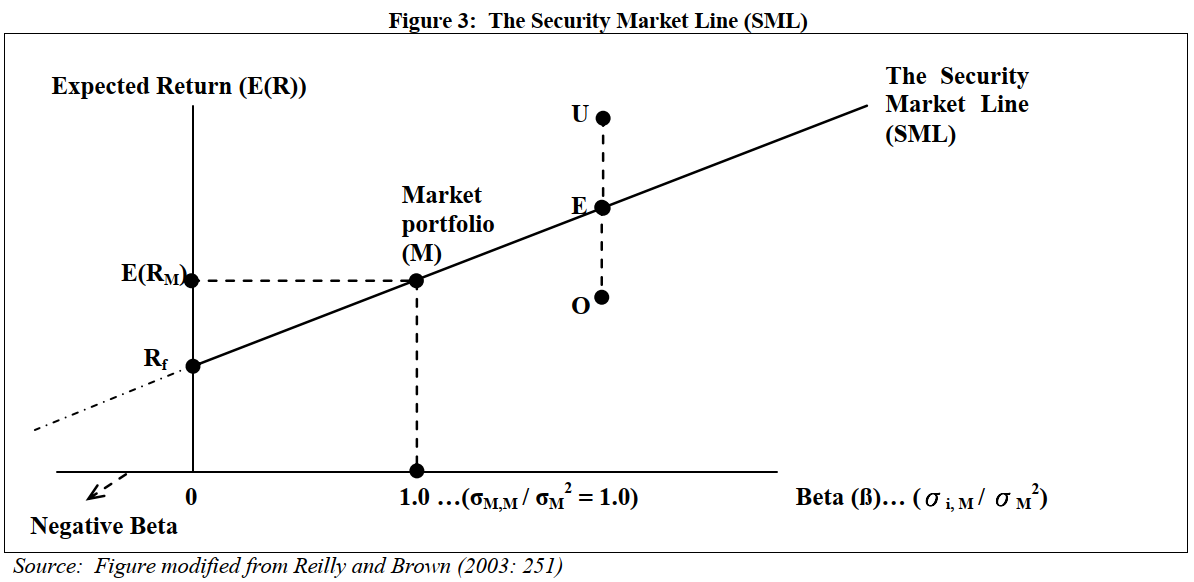


#### Sharp Ratio

William Sharpe.

Useful to compare assets based on a Risk-Return relationship.

$$Sharpe \space ratio = \frac{R_p - R_f}{\sigma_p}$$

***donde:***

${R_p}$ =  Return of Portfolio

${R_f}$ =  Risk-free rate

${\sigma_p}$ = Standard Deviation of the Portfolio's excess return

\
Numerator: Excess Return of the asset

Denominator: Asset Volatility

\
If Asset's Expected Return increases then SR increases.

If Asset's Volatility increases then SR decreases.

**SR > 1 is desired**

How much more Return we can get when the asset becomes more volatile.

Is the compenstation of Return that one gets per each unit of risk taken.


Instalar Librerias

In [88]:
import numpy as np
import pandas as pd
# https://yfinance-python.org/index.html
import yfinance as yf
print(yf.__version__)
import matplotlib.pyplot as plt
from scipy.stats import norm

# Format
pd.options.display.float_format = '{:.9f}'.format 
np.set_printoptions(suppress=True)

# Seed for Random
# import random
# random.seed(42)
np.random.seed(42)


0.2.65


In [89]:
# To display formulas within a code cell

from IPython.display import display, Math

display(Math(r"\bar{r} = \frac{1}{n} \sum_{i=1}^{n} r_i"))

<IPython.core.display.Math object>

## Asset Analysis

### Price


Price of n Assets at Close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   VFIAX        FSPGX           ^RLG
Date                                                
2024-01-02 429.079315186 28.953243256 3006.870117188
2024-01-03 425.656524658 28.684236526 2978.260009766
2024-01-04 424.254119873 28.564676285 2965.760009766
2024-01-05 425.028930664 28.594566345 2968.790039062
2024-01-08 431.030975342 29.182399750 3030.100097656
...                  ...          ...            ...
2025-03-26 525.309509277 36.360000610 3745.929931641
2025-03-27 523.566894531 36.169998169 3726.919921875
2025-03-28 513.248474121 35.240001678 3630.419921875
2025-03-31 516.149597168 35.270000458 3633.590087891
2025-04-01 518.113586426 35.569999695 3664.939941406

[313 rows x 3 columns]


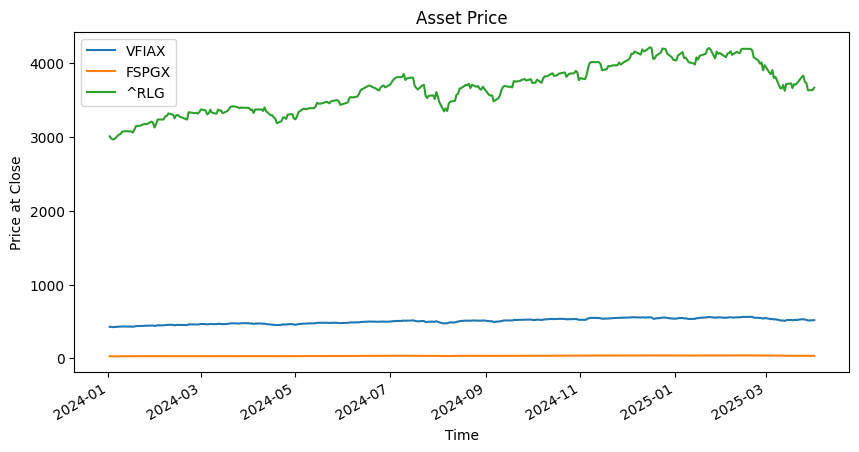

In [90]:
""" 
List of all available Funds in Fidelity for Zoox as of April 2025:

  Fund Name [Ticker symbol]
  Benachmark

SSGA RSL LG CP GR [FSPGX]
Russell 1000 Growth

SSGA RSL LG CP VAL [FLCOX]
Russell 1000 Value

VANG INST 500 IDX TR [VFIAX]
S&P 500

SSGA RSL SM/MD CP [SSMJX]
RS Small Cap Completeness

VANG SMCP GR IDX ADM [VSGAX]
CRSP US Sm Cap Gr Idx

VANG SMCPVL IDX ADM [VSIAX]
CRSP US Sm Cap Val Idx

AF EUROPAC GROWTH R6 [RERGX]
MSCI AC Wld ex US (N)

AF NEW WORLD R6 [RNWGX]
MSCI ACWI (N)

HARRIS OAKMRK INTL 3 [OAKIX]
MSCI Wld ex US (N)

VG IS TL INTL STK MK [VTIAX]
FTSE Global All Cap x US

VANGUARD TARGET 2020 [VTWNX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2025 [VTTVX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2030 [VTHRX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2035 [VTTHX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2040 [VFORX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2045 [VTIVX]
MSCI US Broad Mkt (G)

ANGUARD TARGET 2050 [VFIFX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2055 [VFFVX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2060 [VTTSX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2065 [VLXVX]
MSCI US Broad Mkt (G)

VANGUARD TARGET 2070 [VSVNX]
MSCI US Broad Mkt (G)

VANGUARD TARGET INC [VTINX]
BBg US Agg Bond

VANG RET SVGS TR II [VMRXX] # surrogate: Make a line instead like the page below
FTSE 3-Mo Treasury Bill
https://investor.vanguard.com/mutual-funds/profile/pe/performance/0340?dbOnly=false&crossover=false&planSummaryMask=425886&FundIntExt=INT&InstFund=true&RedemptionFee=true&intPort=0340&SelectedPlanId=094523

PGIM TOTAL RTN BD R6 [PTRQX]
BBg US Agg Bond

VANG INFL PROT ADM [VAIPX]
BBg US TIPS

VG IS TOT BD MKT IDX [VBTIX]
FTSE Global All Cap x US
"""


# tickers = ['AAPL', 'NKE', 'GOOGL', 'MSFT']  # with stocks

tickers = ['VFIAX', 'FSPGX', '^RLG'] # This is my current Fidelity portfolio as of 04/11/2025

# tickers = ['FSPGX', 'FLCOX', 'VFIAX', 'SSMJX', 'VSGAX', 'VSIAX', 'RERGX', 'RNWGX', 'OAKIX', 'VTIAX',
#            'VTWNX', 'VTTVX', 'VTHRX', 'VTTHX', 'VFORX', 'VTIVX', 'VFIFX', 'VFFVX', 'VTTSX', 'VLXVX',
#            'VSVNX', 'VTINX', 'VMRXX', 'PTRQX', 'VAIPX', 'VBTIX']#, 'AAPL', 'NKE', 'GOOGL', 'MSFT']


start_date = '2024-01-01'
end_date = '2025-04-02'

portfolio = pd.DataFrame()

for t in tickers:
  portfolio[t] = yf.download(t, start = start_date, end = end_date, auto_adjust=True)['Close'] #Close Price

print(portfolio)

portfolio.plot(figsize=(10,5))
plt.title('Asset Price')
plt.xlabel('Time')
plt.ylabel('Price at Close')
plt.show()

#### Normalize to 100

**Normalizar** precios de diferentes **magnitudes** dividiendo entre el primer registro. Todos los precios parten del mismo punto que es el 100.


$$
\frac {P_t}{P_0} * 100
$$

Nota: esto ya no es mas el Precio al Cierre sino un indice de crecimiento en el tiempo.

In [91]:
portfolio_norm = (portfolio / portfolio.iloc[0] * 100)
print(portfolio_norm)

                   VFIAX         FSPGX          ^RLG
Date                                                
2024-01-02 100.000000000 100.000000000 100.000000000
2024-01-03  99.202294213  99.070892588  99.048508705
2024-01-04  98.875453758  98.657950105  98.632794041
2024-01-05  99.056028949  98.761185725  98.733564250
2024-01-08 100.454848343 100.791470897 100.772563482
...                  ...           ...           ...
2025-03-26 122.427134258 125.581788159 124.579040186
2025-03-27 122.021005442 124.925549271 123.946821001
2025-03-28 119.616223844 121.713486007 120.737503796
2025-03-31 120.292351298 121.817097126 120.842934556
2025-04-01 120.750073026 122.853247841 121.885542061

[313 rows x 3 columns]


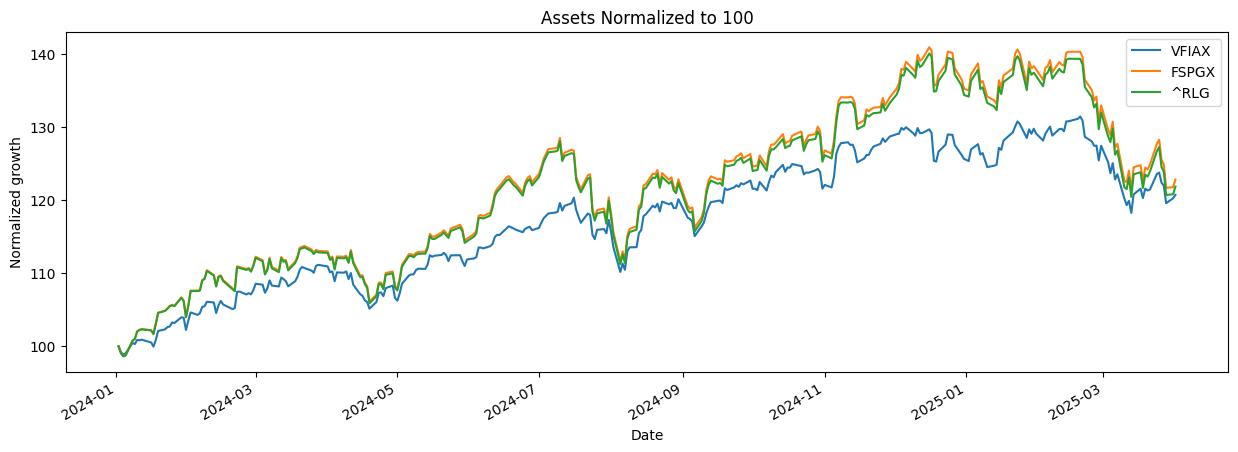

In [92]:
# Plot Normalized portfolio

portfolio_norm.plot(figsize=(15,5))
plt.title('Assets Normalized to 100')
plt.xlabel('Date')
plt.ylabel('Normalized growth')
plt.show()

Para el caso de los Stocks:

Comparando con la grfica anterior vemos que APPL tuvo rendimientos similares a MSFT que no se podian ver en la primer grafica.

De la misma forma GOOGL tiene mejores rendiminetos (al final) que NKE.

### Asset Return

Rendimiento entre dos periodos de tiempo

$$
return = \frac {P_t}{P_{t-1}} -1
$$

Nota: hay otras opciones de rendimiento como logaritmico, aditivo, etc (estudiar)

In [93]:
# Choose a stock and analyze its Returns between 2 periods

asset = tickers #tickers[0]

ASSET = portfolio[asset]

# return = (P_t / P_t-1) - 1
ASSET_return = (ASSET / ASSET.shift(1))-1

print('ASSET Returns: \n',ASSET_return)

#Comprobacion: (P_t / P_t-1) - 1
print('Comprobacion with the first day:\n',(portfolio_norm[asset].iloc[1]/portfolio_norm[asset].iloc[0])-1)

# min, max and avg returns per year in all period
print('Minimum return in the whole period per day:\n', ASSET_return.min())
print('Maximum return in the whole period per day:\n', ASSET_return.max())
print('Average return in the whole period per day:\n', ASSET_return.mean())

ASSET Returns: 
                   VFIAX        FSPGX         ^RLG
Date                                             
2024-01-02          NaN          NaN          NaN
2024-01-03 -0.007977058 -0.009291074 -0.009514913
2024-01-04 -0.003294686 -0.004168151 -0.004197082
2024-01-05  0.001826289  0.001046399  0.001021670
2024-01-08  0.014121497  0.020557521  0.020651531
...                 ...          ...          ...
2025-03-26 -0.011165286 -0.021265165 -0.021429176
2025-03-27 -0.003317310 -0.005225590 -0.005074844
2025-03-28 -0.019707931 -0.025711820 -0.025892695
2025-03-31  0.005652473  0.000851271  0.000873223
2025-04-01  0.003805078  0.008505791  0.008627790

[313 rows x 3 columns]
Comprobacion with the first day:
 VFIAX   -0.007977058
FSPGX   -0.009291074
^RLG    -0.009514913
dtype: float64
Minimum return in the whole period per day:
 VFIAX   -0.029938370
FSPGX   -0.039470204
^RLG    -0.039674852
dtype: float64
Maximum return in the whole period per day:
 VFIAX   0.025296294
FSPGX   0

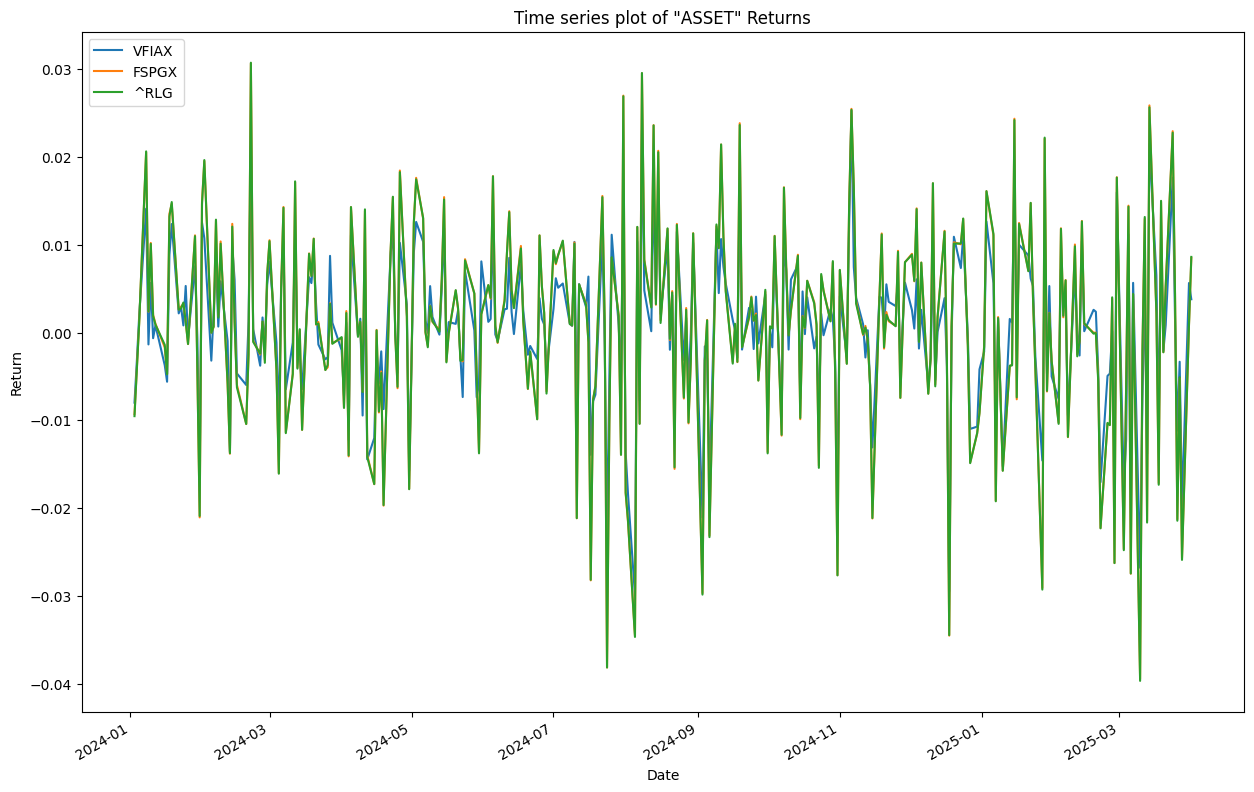

In [94]:
# Plot the Returns of the ASSET

ASSET_return.plot(figsize=(15,10))
plt.title('Time series plot of "ASSET" Returns')
plt.ylabel('Return')
plt.show()

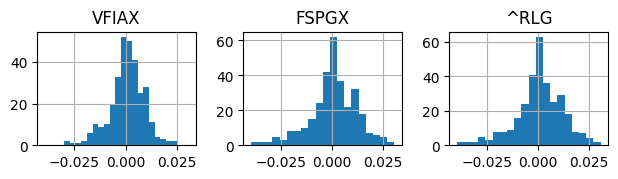

In [95]:
# Plot Histogram (frequency plot) of Returns per day

# Number of bins using Sturges rule: 
# k = 1 + 3.32 log(n)
n , c = ASSET_return.shape
k = int(1 + 3.32 * np.log(n))


ASSET_return.hist(figsize=(18,13), bins=k, layout=(7,7), sharex=True)
#plt.hist(ASSET_return, bins=k) # Para 1 stock
plt.title('Histogram of "ASSET" return per day')
plt.xlabel('Return')
plt.ylabel('Frequency')
#plt.axvline(x=ASSET_return.mean(), color='red', linestyle='--', label=f'mean={round(ASSET_return.mean()*100,3)}%')
#plt.legend()  # Para 1 stock
plt.show()

Returns above look "similar" to a Normal Distribution.

Plot next to a Normal PDF:

ASSET daily returns:
mean: 0.0006911672615039124
std: 0.0019039936575722446
min: -0.039674852190409116
max: 0.03075549895840668
length: 939


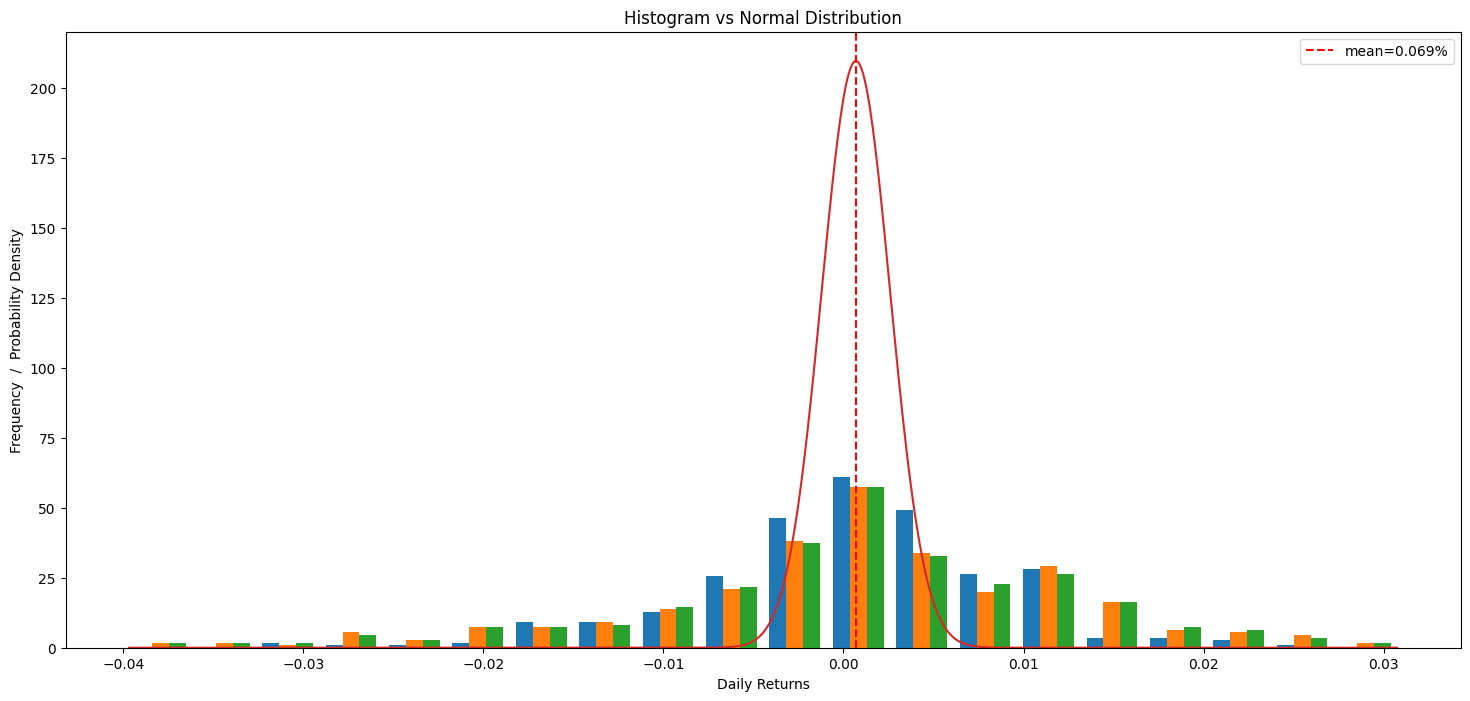

In [96]:
mu = ASSET_return.mean(axis=None).mean()
std = ASSET_return.std(axis=0).std()
min = ASSET_return.min(axis=None).min()
max = ASSET_return.max(axis=None).max()
length = ASSET_return.size

print('ASSET daily returns:')
print('mean:', mu)
print('std:',std)
print('min:',min)
print('max:',max)
print('length:',length)

x = np.linspace(min, max, length)
plt.figure(figsize=(18,8))
# histogram
plt.hist(ASSET_return, bins=20, density=True)
# Normal PDF
p = norm.pdf(x, mu, std)
# plot
plt.plot(x,p)
plt.title('Histogram vs Normal Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency  /  Probability Density', color='black')
plt.axvline(x=mu, color='red', linestyle='--', label=f'mean={round(mu*100,3)}%')
plt.legend()
plt.show()

**Estimated Annual Return** of asset (250 business days)

In [97]:
ASSET_return_estimated = ASSET_return.mean() * 250
print('Estimated Annual Return:\n',round(ASSET_return_estimated * 100,3),'%')

Estimated Annual Return:
 VFIAX   16.010000000
FSPGX   18.230000000
^RLG    17.597000000
dtype: float64 %


### Asset Risk

Asset Volatility (risk or std)

$$
\sigma = risk = \sqrt{\frac {\sum(r - \bar{r})^2}{n-1}}
$$

In [98]:
# Choose 2 Assets from portfolio above 
# 1. Asset to compare 
# 2. Benchmark


ASSET1 = portfolio[tickers[0]]
ASSET2 = portfolio[tickers[1]]


In [99]:
# Obtain Returns

ASSET1_return = (ASSET1 / ASSET1.shift(1))-1
ASSET2_return = (ASSET2 / ASSET2.shift(1))-1

In [100]:
# Obtain Estimated Annual Return

print('Annual Return "ASSET1"', round(ASSET1_return.mean()*250 *100, 4),'%')
print('Annual Return "ASSET2"', round(ASSET2_return.mean()*250 *100, 4), '%')

Annual Return "ASSET1" 16.0099 %
Annual Return "ASSET2" 18.2305 %


Estimated Annual Risk (std)

In [101]:
print('Annual Risk "ASSET1"', round(ASSET1_return.std() * (250 ** 0.5), 4))
print('Annual Risk "ASSET2"', round(ASSET2_return.std() * (250 ** 0.5),4))

Annual Risk "ASSET1" 0.134
Annual Risk "ASSET2" 0.1861


## Portfolio Analysis

In [102]:
# Show Portfolio again to recap
portfolio.tail(5) # in $

,VFIAX,FSPGX,^RLG
Date,,,
2025-03-26,525.309509277,36.360000610,3745.929931641
2025-03-27,523.566894531,36.169998169,3726.919921875
2025-03-28,513.248474121,35.240001678,3630.419921875
2025-03-31,516.149597168,35.270000458,3633.590087891
2025-04-01,518.113586426,35.569999695,3664.939941406


### Portfolio Return
Return Equation:
$$
return = \frac {P_t}{P_{t-1}} -1
$$

In [103]:
# Portfolio Returns

portfolio_retuns = (portfolio / portfolio.shift(1)) -1

print('Portfolio Returns: \n\n',portfolio_retuns)

Portfolio Returns: 

                   VFIAX        FSPGX         ^RLG
Date                                             
2024-01-02          NaN          NaN          NaN
2024-01-03 -0.007977058 -0.009291074 -0.009514913
2024-01-04 -0.003294686 -0.004168151 -0.004197082
2024-01-05  0.001826289  0.001046399  0.001021670
2024-01-08  0.014121497  0.020557521  0.020651531
...                 ...          ...          ...
2025-03-26 -0.011165286 -0.021265165 -0.021429176
2025-03-27 -0.003317310 -0.005225590 -0.005074844
2025-03-28 -0.019707931 -0.025711820 -0.025892695
2025-03-31  0.005652473  0.000851271  0.000873223
2025-04-01  0.003805078  0.008505791  0.008627790

[313 rows x 3 columns]


**Weight Vector**: Percentaje of investment of each asset in the porfolio. Sum equals 1

In [104]:
# number of assets
no_assets = np.size(tickers)

# Create Random Weights
np.random.seed(42)
weights_r = np.random.random(no_assets) # 0-1 random numbers
sum_of_random_numbers = np.sum(weights_r)
weights = weights_r / sum_of_random_numbers

print('weights:\n', weights)
print('sum weights:\n', sum(weights))

weights:
 [0.18205878 0.46212909 0.35581214]
sum weights:
 1.0


Annual Return of each Asset in portfolio

In [105]:
portfolio_annual_returns = portfolio_retuns.mean() * 250
portfolio_annual_returns

VFIAX   0.160098716
FSPGX   0.182304639
^RLG    0.175972091
dtype: float64

In [1]:
# Volatility (Risk)

sd = portfolio_retuns.std()
sd

NameError: name 'portfolio_retuns' is not defined

**Total Portfolio Return** (matrix product sum of *portfolio_annual_estimated_return* and *weights*)

In [107]:
# Total Annual Portfolio Return
np.dot(portfolio_annual_returns, weights)

# Format
print('Portfolio Annual Return: ', str(round(np.dot(portfolio_annual_returns, weights),5)*100)+'%')

Portfolio Annual Return:  17.601%


### Portfolio Risk

using the same weight distribution of assets in the portfolio

In [108]:
# same wights as above
print('weights:', weights)
print('sum weights:', sum(weights))

weights: [0.18205878 0.46212909 0.35581214]
sum weights: 1.0


Variance - Covariance Matrix of Portfolio

In [109]:
# First Obtain Variance-Covariance Matrix of Portfolio
portfolio_retuns.cov()

,VFIAX,FSPGX,^RLG
VFIAX,0.000071824,0.000095326,0.000095309
FSPGX,0.000095326,0.000138568,0.000138589
^RLG,0.000095309,0.000138589,0.000138625


In [110]:
# Obtain Variance of Portfolio
var_portfolio = np.dot(weights.T, np.dot(portfolio_retuns.cov() * 250, weights))
var_portfolio

np.float64(0.030872239758819725)

**Total Portfolio Risk**

In [111]:
risk_portfolio = (var_portfolio) ** 0.5
print('Portfolio Risk:',round(risk_portfolio * 100,5),'%')

Portfolio Risk: 17.5705 %


## Efficient Frontier

More ***Return*** with Less ***Risk*** . - Harry Markowitz

In the previous analysis we Estimated the return based on the mean only, which is a basic approach. Here we are going to Estimate the return including the Market return and the relationship between the Asset and the Market.

This allows us to analyize graphically the combination of portfolios that yield the best return assuming same risk than other portfolios.

We must look for asset that have certain amount of relationship between them. This in order to create an optimal portfolio that maximizes return and minimizes risk. Assets have to be in the same market to have relationship.

Variance - Covariance Matrix of Portfolio Annualized

In [112]:
cov_portfolio = portfolio_retuns.cov() * 250
print(cov_portfolio)

            VFIAX       FSPGX        ^RLG
VFIAX 0.017955942 0.023831566 0.023827143
FSPGX 0.023831566 0.034642066 0.034647177
^RLG  0.023827143 0.034647177 0.034656208


Correlation Matrix

In [113]:
corr_portfolio = portfolio_retuns.corr()
corr_portfolio

,VFIAX,FSPGX,^RLG
VFIAX,1.000000000,0.955534980,0.955162714
FSPGX,0.955534980,1.000000000,0.999943457
^RLG,0.955162714,0.999943457,1.000000000


### A Single Portfolio

Calculate **Estimated** **Return**, **Variance** and **Risk** of a **Randomly Weighted** Portfolio

First create Random portfolio Weights

In [114]:
# number of assets
no_assets = np.size(tickers)

# Create Random Weights
np.random.seed(42)
weights_r = np.random.random(no_assets) # 0-1 random numbers
sum_of_random_numbers = np.sum(weights_r)
weights_r = weights_r / sum_of_random_numbers

# Uncomment to understand above (if needed)
print('Random numbers created:\n',weights_r)
print('sum of random numbers != 1 \n:',sum_of_random_numbers)
print('normalize random numbers: \n',weights_r)
print('sum of random numbers: \n',np.sum(weights_r))
print(weights_r)

Random numbers created:
 [0.18205878 0.46212909 0.35581214]
sum of random numbers != 1 
: 2.057248367068684
normalize random numbers: 
 [0.18205878 0.46212909 0.35581214]
sum of random numbers: 
 1.0
[0.18205878 0.46212909 0.35581214]


Expected **Return** of Portfolio

In [115]:
portfolio_retun = np.dot(portfolio_annual_returns, weights_r)
portfolio_retun

np.float64(0.17600865839092547)

Expected **Variance** of Portfolio

In [116]:
portfolio_var = np.dot(weights_r.T, np.dot(cov_portfolio, weights_r))
portfolio_var


np.float64(0.030872239758819725)

Expected **Risk** of Portfolio

In [117]:
portfolio_risk = np.sqrt(portfolio_var)
portfolio_risk

np.float64(0.17570497932278334)

Summary:

In [118]:
print('Percentaje Randomly Invested in each Asset: \n', weights_r)
print('Expected Return:   ', round(portfolio_retun * 100, 4), '%')
print('Expected Variance: ', round(portfolio_var * 100, 4))
print('Expected Risk:     ', round(portfolio_risk * 100, 4), '%')


Percentaje Randomly Invested in each Asset: 
 [0.18205878 0.46212909 0.35581214]
Expected Return:    17.6009 %
Expected Variance:  3.0872
Expected Risk:      17.5705 %


### Many Portfolios

Create **Different Portfolios** with **random weights** to plot the **Efficient Frontier**

Data Frame portfolio: 

            Return        Risk  \
0     0.166622140 0.150203700   
1     0.178963565 0.183930101   
2     0.169431784 0.162754952   
3     0.166295781 0.149135574   
4     0.174999534 0.175760553   
...           ...         ...   
99995 0.169868189 0.161954422   
99996 0.176670771 0.177342032   
99997 0.167892558 0.156587521   
99998 0.168974436 0.160730363   
99999 0.171136871 0.163542187   

                                                 Weights  
0      [0.657381271833743, 0.17132260711444883, 0.171...  
1      [0.03807825678154029, 0.5678448096745716, 0.39...  
2      [0.41686469204449644, 0.012118741982948326, 0....  
3      [0.6786548843400361, 0.1731109959235988, 0.148...  
4      [0.181157578987603, 0.3005149012112804, 0.5183...  
...                                                  ...  
99995  [0.4317243238171233, 0.11828092680555288, 0.44...  
99996  [0.1531213531070695, 0.4941506731762709, 0.352...  
99997  [0.5330633526516754, 0.06032037464164686

<Figure size 1000x600 with 0 Axes>

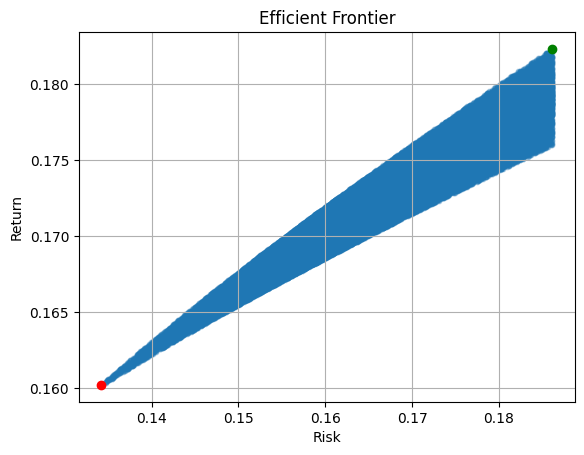

Minimum Variance Protfolio
Return:  16.021 %
Minimum Risk: 13.423 %
Weights for Min risk: [0.99479859 0.00483848 0.00036293]
Sum of weights: 1.0

Maximum Return Protfolio
Maximum Return: 18.23 %
Risk:  18.612 %
Weights for Max return: [0.00005268 0.99865702 0.0012903 ]
Sum of weights: 1.0


In [119]:
# Lists to be filled with with different portfolios and used to plot
portfolio_retun_list = []
portfolio_risk_list = []
portfolio_weights_list = []

for i in range(100000):
  weights_r = np.random.random(no_assets)
  weights_r = weights_r / np.sum(weights_r)

  portfolio_retun = np.dot(portfolio_annual_returns, weights_r)
  portfolio_risk = np.sqrt(np.dot(weights_r.T, np.dot(cov_portfolio, weights_r)))

  #Add elements to Lists
  portfolio_retun_list.append(portfolio_retun)
  portfolio_risk_list.append(portfolio_risk)
  portfolio_weights_list.append(weights_r)

# Convert List to Array
portfolio_retun_list = np.array(portfolio_retun_list)
portfolio_risk_list = np.array(portfolio_risk_list)
#portfolio_weights_list = np.array(portfolio_weights_list)


# Create Data Frame
portfolio = pd.DataFrame({'Return':portfolio_retun_list, 'Risk': portfolio_risk_list, 'Weights': portfolio_weights_list})
print('Data Frame portfolio: \n\n',portfolio)

# Minimum Risk and Return associated
min_risk = portfolio['Risk'].min()
ret = portfolio.loc[portfolio['Risk'] == min_risk, 'Return'].iloc[0]
weights_min_risk = portfolio.loc[portfolio['Risk'] == min_risk, 'Weights'].iloc[0]

# Maximum Return and Risk associated
max_return = portfolio['Return'].max()
risk = portfolio.loc[portfolio['Return'] == max_return, 'Risk'].iloc[0]
weights_max_return = portfolio.loc[portfolio['Return'] == max_return, 'Weights'].iloc[0]

# Plot Efficient Frontier
plt.figure(figsize = (10, 6))
portfolio.plot(x = 'Risk', y = 'Return', kind = 'scatter', marker = 'o', s = 10, alpha = 0.3, grid = True)
plt.plot(min_risk, ret, marker = 'o', color = 'red')
plt.plot(risk, max_return, marker = 'o', color = 'green')
plt.title('Efficient Frontier')
plt.plot()
plt.show()

print('Minimum Variance Protfolio')
print('Return: ', round(ret*100, 3), '%')
print('Minimum Risk:', round(min_risk*100, 3), '%')
print('Weights for Min risk:', weights_min_risk)
print('Sum of weights:', sum(weights_min_risk))

print('\nMaximum Return Protfolio')
print('Maximum Return:', round(max_return*100, 3),'%')
print('Risk: ', round(risk*100, 3),'%')
print('Weights for Max return:', weights_max_return)
print('Sum of weights:', sum(weights_max_return))

### Minimum Variance Portfolio (weights)

Approximation to zero variance

In [120]:
from scipy.optimize import minimize


def min_var(returns):
  """
  Funcion to find the WEIGHTS of the Minimum Variance Portfolio given Annualized Returns
  """

  def risk_portfolio(weights):
    """
    Function to find the RISK of a Portfolio given some Weights
    weights: weights to be updated during the MINIMIZE process
    weights start as "Initial" below (all equal 25%)
    """
    # covariance of portfolio returns
    cov = returns.cov() * 250

    # portfolio risk (std)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    return portfolio_risk


  def weight_restriction(weights):
    """
    Function used by 'restrictions' below.
    When used in OPTIMIZER in minimize function as 'constrain'
    the solver looks to complete this function (constrain) by changing the
    weight values, such as the sum of the weights must be = 1, then minus 1,
    result must be 0.
    Minimize(constrains) makes this function equals zero.
    Until then the sum of the weights is correct (=1).
    """
    return np.sum(weights) - 1

  # range of possible values that each Weight can take, i.e. from 0 to 1
  # limits = [(0,1),(0,1), ... ,(0,1)]
  limits = [(0, 1) * 1 for _ in range(no_assets)] # <- dynamic for n Assets

  # Initial weights (all equally distributed)
  # initial = [0.25, 0.25, ... , 0.25]
  initial = [0.25 * 1 for _ in range(no_assets)] # <- dynamic for n Assets

  # Constrains Dictionary:
  # type of restriction: equity (=) or ineq (<, >, !=),
  # function to be done as equity: weight_restriction (will be equalized to zero)
  restrictions = {'type': 'eq', 'fun': weight_restriction}

  # Optimizer: Minimize the Function Risk of Portfolio by changing Weights (x)
  # starting at 'Initial' and within given limits (0,1), constrained by
  # 'restrictions' making the function value equals zero, using method SLSQP
  # Sequential List Square Programming
  optimizar = minimize(fun = risk_portfolio,
                      x0 = initial,
                      bounds = limits,
                      constraints = restrictions,
                      method = 'SLSQP')

  # Returns 'x' which is the List of Optimized Weights for a Minimized Portfolio Risk
  return list(optimizar['x'])


min_var_portfolio = min_var(portfolio_retuns) # <-"Portfolio Risk" section

# Data Frame: Weights vs Asset name
min_var_portfolio = pd.DataFrame({'Asset':tickers, 'Weight': min_var_portfolio})
print('List of Weights of Minimum Variance Portfolio:\n',min_var_portfolio)

List of Weights of Minimum Variance Portfolio:
    Asset      Weight
0  VFIAX 1.000000000
1  FSPGX 0.000000000
2   ^RLG 0.000000000


Minimum Variance Weights: [1.0, 2.220446049250313e-16, 0.0]
Portfolio Annual Return:  16.00987 %
Portfolio Risk: 13.39998 %


<Figure size 1000x600 with 0 Axes>

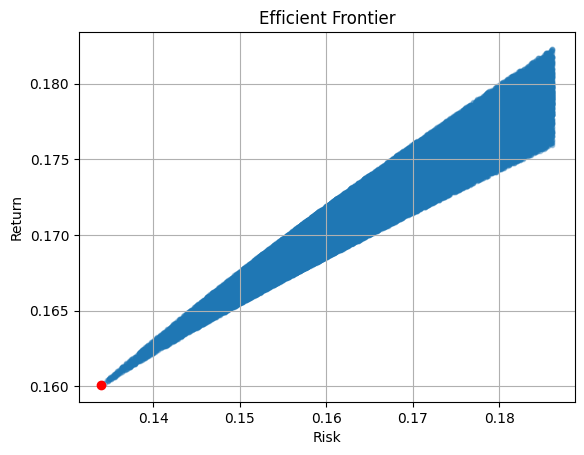

In [121]:
weights = min_var_portfolio['Weight']
print('Minimum Variance Weights:',list(weights))

# Expected Return of Portfolio
return_portfolio = np.dot(portfolio_annual_returns, weights)
# Format
print('Portfolio Annual Return: ', round(return_portfolio*100,5),'%')

# First Obtain Variance-Covariance Matrix of Portfolio
cov_portfolio = portfolio_retuns.cov() * 250

# Expected Variance of Portfolio
var_portfolio = np.dot(weights.T, np.dot(cov_portfolio, weights))
var_portfolio

# Expected Risk of Portfolio
risk_portfolio = (var_portfolio) ** 0.5
print('Portfolio Risk:',round(risk_portfolio * 100,5),'%')


# Plot Efficient Frontier
plt.figure(figsize = (10, 6))
portfolio.plot(x = 'Risk', y = 'Return', kind = 'scatter', marker = 'o', s = 10, alpha = 0.3, grid = True)
plt.plot(risk_portfolio, return_portfolio, marker = 'o', color = 'red')
plt.title('Efficient Frontier')
plt.plot()
plt.show()

In [122]:
portfolio_retuns

,VFIAX,FSPGX,^RLG
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.007977058,-0.009291074,-0.009514913
2024-01-04,-0.003294686,-0.004168151,-0.004197082
2024-01-05,0.001826289,0.001046399,0.001021670
2024-01-08,0.014121497,0.020557521,0.020651531
...,...,...,...
2025-03-26,-0.011165286,-0.021265165,-0.021429176
2025-03-27,-0.003317310,-0.005225590,-0.005074844
2025-03-28,-0.019707931,-0.025711820,-0.025892695


### Maximum Return Portfolio (weights)

In [ ]:
from scipy.optimize import minimize

def max_ret(returns):
  """
  Funcion to find the WEIGHTS of the Maximum Return Portfolio given Annualized Returns
  """

  def return_portfolio(weights):
    """
    Function to find the Return of a Portfolio given some Weights
    weights: weights to be updated during the "minimize" process (the negative is used for MAXIMIZATION)
    weights start as "Initial" below (all equal 25%)
    """
    portfolio_return = np.dot(returns, weights)

    return - portfolio_return


  def weight_restriction(weights):
    """
    Function used by 'restrictions' below.
    When used in OPTIMIZER in minimize function as 'constrain'
    the solver looks to complete this function (constrain) by changing the
    weight values, such as the sum of the weights must be = 1, then minus 1,
    result must be 0.
    Minimize(constrains) makes this function equals zero.
    Until then the sum of the weights is correct (=1).
    """
    return np.sum(weights) - 1

  # range of possible values that each Weight can take, i.e. from 0 to 1
  # limits = [(0,1),(0,1), ... ,(0,1)]
  limits = [(0,1) * 1 for _ in range(no_assets)] # <- dynamic for n Assets

  # Initial weights (all equally distributed)
  # initial = [0.25, 0.25, ... , 0.25]
  initial = [0.25 * 1 for _ in range(no_assets)] # <- dynamic for n Assets

  # Constrains Dictionary:
  # type of restriction: equity (=) or ineq (<, >, !=),
  # function to be done as equity: weight_restriction (will be equalized to zero)
  restrictions = {'type': 'eq', 'fun': weight_restriction}

  # Optimizer: Minimize the Function Return of Portfolio by changing Weights (x)
  # starting at 'Initial' and within given limits (0,1), constrained by
  # 'restrictions' making the function value equals zero, using method SLSQP
  # Sequential List Square Programming.
  # Note: in the return of the funcion is a (-) which means MAXIMIZE the RETURN in fact.
  optimizar = minimize(fun = return_portfolio,
                      x0 = initial,
                      bounds = limits,
                      constraints = restrictions,
                      method = 'SLSQP')

  # Returns 'x' which is the List of Optimized Weights for a Maximized Portfolio Return
  return list(optimizar['x'])


max_ret_portfolio = max_ret(portfolio_annual_returns) # <-"Portfolio Return" section

# Data Frame: Weights vs Asset name
max_ret_portfolio = pd.DataFrame({'Asset':tickers, 'Weight': max_ret_portfolio})
print('List of Weights of Maximum Portfolio Return:\n',max_ret_portfolio)
print('Sum of Portfolio weights:', max_ret_portfolio['Weight'].sum())


List of Weights of Maximum Portfolio Return:
    Asset      Weight
0  VFIAX 0.000000000
1  FSPGX 1.000000000
2   ^RLG 0.000000000
Sum of Portfolio weights: 1.0


Maximum Return Weights: [0.0, 1.0, 0.0]
Portfolio Annual Return:  18.23046 %
Portfolio Risk: 18.61238 %


<Figure size 1000x600 with 0 Axes>

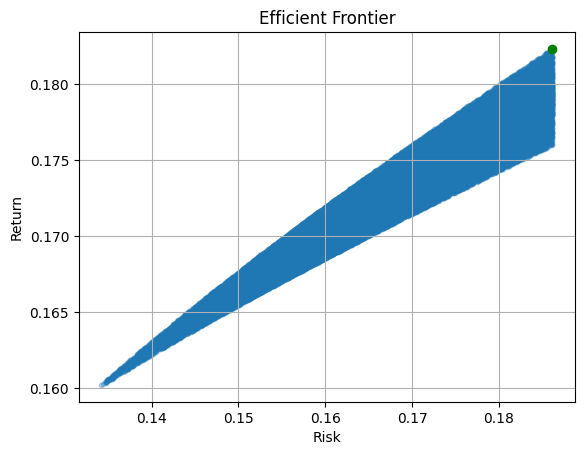

In [124]:
weights = max_ret_portfolio['Weight']
print('Maximum Return Weights:',list(weights))

# Expected Return of Portfolio
return_portfolio = np.dot(portfolio_annual_returns, weights)
# Format
print('Portfolio Annual Return: ', round(return_portfolio*100,5),'%')

# First Obtain Variance-Covariance Matrix of Portfolio
cov_portfolio = portfolio_retuns.cov() * 250

# Expected Variance of Portfolio
var_portfolio = np.dot(weights.T, np.dot(cov_portfolio, weights))
var_portfolio

# Expected Risk of Portfolio
risk_portfolio = (var_portfolio) ** 0.5
print('Portfolio Risk:',round(risk_portfolio * 100,5),'%')


# Plot Efficient Frontier
plt.figure(figsize = (10, 6))
portfolio.plot(x = 'Risk', y = 'Return', kind = 'scatter', marker = 'o', s = 10, alpha = 0.3, grid = True)
plt.plot(risk_portfolio, return_portfolio, marker = 'o', color = 'green')
plt.title('Efficient Frontier')
plt.plot()
plt.show()

## CAPM (Capital Asset Pricing Model)

CAPM Equation:

$$
r_{i} = r_{f} + \beta_{im}*(r_{m}-r_{f})
$$

***where*** :\
$r_i = $ Expected Asset Return\
$r_f = $ Risk-free asset Return\
$\beta_{i,m} = $ Asset Beta w.r.t market\
$r_m = $ Market Return

\
Risk-free is the minimum Return an Investor can accept.\
Difference between $r_{m}$ and $r_{f}$ is the Premium that the investor recieves by taking the risk (**equity risk Premium**).\
**$\beta$** measures the cuantity of Risk of an asset with respect to the Market.

### Asset Beta ( $\beta$ )


$$\beta = \frac{\text{Cov(}r_A, r_m\text{)}}{Var(r_m)} = \frac{\sigma_{A,m}}{\sigma_m^2} = \frac{ρ_{A,m} σ_m σ_A}{\sigma_m^2} = \frac{ρ_{A,m}σ_A}{\sigma_m}$$


From "tickers" select one **Asset to analyze**:

In [125]:
ASSET = tickers[0]
ASSET

'VFIAX'

Bring two Indices:

Market Index:

[NASDAQ Composite (^IXIC)](https://finance.yahoo.com/quote/%5EIXIC/)

Risk-free Index:

[CBOE Interest Rate 10 Year T No (^TNX)](https://finance.yahoo.com/quote/%5ETNX/)

Market Index:

[S&P 500 (^GSPC)](https://finance.yahoo.com/quote/%5EGSPC/)


In [126]:
tickers2 = [ASSET, '^GSPC', '^IXIC', '^TNX']

capm = pd.DataFrame()

for t in tickers2:
  capm[t] = yf.download(t, start = start_date, end = end_date, auto_adjust=True)['Close']

capm

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,VFIAX,^GSPC,^IXIC,^TNX
Date,,,,
2024-01-02,429.079315186,4742.830078125,14765.940429688,3.946000099
2024-01-03,425.656524658,4704.810058594,14592.209960938,3.907000065
2024-01-04,424.254119873,4688.680175781,14510.299804688,3.990999937
2024-01-05,425.028930664,4697.240234375,14524.070312500,4.041999817
2024-01-08,431.030975342,4763.540039062,14843.769531250,4.001999855
...,...,...,...,...
2025-03-26,525.309509277,5712.200195312,17899.019531250,4.337999821
2025-03-27,523.566894531,5693.310058594,17804.029296875,4.368999958
2025-03-28,513.248474121,5580.939941406,17322.990234375,4.255000114


To obtain Asset and Market Index **Returns**:

In [127]:
capm_returns = (capm / capm.shift(1)) - 1
capm_returns

,VFIAX,^GSPC,^IXIC,^TNX
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-0.007977058,-0.008016315,-0.011765622,-0.009883435
2024-01-04,-0.003294686,-0.003428381,-0.005613280,0.021499839
2024-01-05,0.001826289,0.001825686,0.000949016,0.012778722
2024-01-08,0.014121497,0.014114629,0.022011682,-0.009896082
...,...,...,...,...
2025-03-26,-0.011165286,-0.011156935,-0.020405140,0.007197506
2025-03-27,-0.003317310,-0.003306981,-0.005307008,0.007146182
2025-03-28,-0.019707931,-0.019737221,-0.027018550,-0.026092892


To obtain **Variance - Covariance Matrix** of ASSET and Index **Returns**

In [128]:
cov = capm_returns.cov()  * 250   # annualized
cov

,VFIAX,^GSPC,^IXIC,^TNX
VFIAX,0.017955942,0.017947877,0.024575632,-0.000212528
^GSPC,0.017947877,0.017940664,0.024567809,-0.000211757
^IXIC,0.024575632,0.024567809,0.036713781,0.001852505
^TNX,-0.000212528,-0.000211757,0.001852505,0.046509349


From table above extract only the **Covariance** between ASSET and its Market Index

In [129]:
# Covariance [VFIAX] and [^GSPC] as is the most representative Market Index
cov_asset_market = cov.iloc[0,1]
cov_asset_market

np.float64(0.017947876797757983)

To obtain **Market Variance**

In [130]:
# Market Variance, in this case [GSPC] Variance
var_market = capm_returns['^GSPC'].var() * 250  # Annualized
var_market

np.float64(0.017940664206399625)

Calculate **Beta** (**$β$**)

In [131]:
ASSET_beta = cov_asset_market / var_market
ASSET_beta

np.float64(1.0004020247676106)

Compare result with Yaho Finance's info

In [132]:
asset = yf.Ticker(ASSET)
ASSET_beta_yf = asset.info.get('beta')
print(ASSET_beta_yf)
# Note this is Beta (5Y Monthly), we did it Daily and we didn't include Idiosyncratic risk and alpha.

None


### Asset Estimated Return with CAPM

$$
r_{i} = r_{f} + \beta_{im}*(r_{m}-r_{f})
$$

First, obtain latest **Risk-free** rate data from ^TNX Index

In [133]:
index_col = capm.columns.get_loc('^TNX')
risk_free = capm.iloc[-1, index_col] / 100
risk_free

np.float64(0.041560001373291015)

To obtain **Market Returns**

In [134]:
market_return = capm_returns['^GSPC'].mean() * 250
market_return

np.float64(0.14683706231095855)

compute **Risk Premium**

In [135]:
risk_premium = market_return - risk_free
risk_premium

np.float64(0.10527706093766753)

Calculate **ASSET Return using CAPM model**

In [136]:
ASSET_capm_return = risk_free + (ASSET_beta * risk_premium)
ASSET_capm_return

np.float64(0.14687938629691674)

Compare with Estimated Return via Average (mean)

In [137]:
capm_returns[ASSET].mean() * 250

np.float64(0.16009871610922327)

Conclusion:

Estimating Returns using Mean (average) is not good due to the high volatility of the market and a High Beta of the ASSET, is better to use asset return via CAPM model (closer to the value reported in yahoo at 10years)

### Asset Sharpe Ratio

$$
Sharpe \space ratio = \frac{R_p - R_f}{\sigma_p}
$$

Is the compenstation of Return that one get pear each unit of risk taken.

In [138]:
# ASSET Return
ASSET_return = capm_returns[ASSET].mean() * 250

# ASSET Risk
ASSET_risk = capm_returns[ASSET].std() * 250 ** 0.5

#Sharpe Ratio
sharpe_ratio_ASSET = (ASSET_return - risk_free) / ASSET_risk

print('Sharpe Ratio of', ASSET, 'is:', sharpe_ratio_ASSET)

Sharpe Ratio of VFIAX is: 0.8846187134648937


## ... TO do's



1. Portfolio Beta
2. Portfolio Estimated Return with CAPM
3. Portfolio Sharpe Ratio

4. Tangent Portfolio
5. Optimize risk-Return tradeoff

6. Include alpha, Idiosyncratic risk (epsilon)

7. APT and factor models


